# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
# Your Code Here

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
fitbit2 = pd.read_csv("../data/Fitbit2.csv")
fitbit2

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


In [4]:
fitbit=fitbit2.copy()
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


In [5]:
columnas=fitbit.keys()
columnas

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [6]:
minus_columnas=[]
for items in columnas:
    minus_columnas.append(items.replace(" ", "_").lower())
print(minus_columnas)

['date', 'calorie_burned', 'steps', 'distance', 'floors', 'minutes_sedentary', 'minutes_lightly_active', 'minutes_fairly_active', 'minutes_very_active', 'activity_calories', 'minutesofsleep', 'minutesofbeingawake', 'numberofawakings', 'lengthofrestinminutes', 'distance_miles', 'days', 'days_encoded', 'work_or_weekend', 'hours_sleep', 'sleep_efficiency', 'yesterday_sleep', 'yesterday_sleep_efficiency', 'months', 'months_encoded']


In [7]:
fit=fitbit.set_axis(minus_columnas, axis=1)
fit

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [9]:
fit["steps"].mean().round(2)

10121.59

In [10]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
Average_bymonth = pd.DataFrame(fit["steps"].groupby(fit["months_encoded"]).mean())
Average_bymonth

,steps
months_encoded,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774
6,12536.166667
7,9193.322581
8,11584.774194
9,9191.333333


In [11]:
Total_bymonth= pd.DataFrame(fit["steps"]).groupby(fit["months_encoded"]).sum()
Total_bymonth.head()

,steps
months_encoded,
1,306654
2,267686
3,319701
4,392371
5,329223


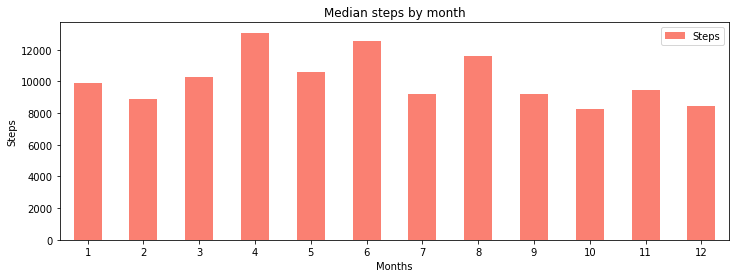

In [14]:
Figure1=Average_bymonth.plot(kind="bar", color="salmon",title="Median steps by month",figsize=(12,4),ylabel='Steps',xlabel="Months",)
plt.xticks(rotation=360)
plt.legend(["Steps"])
Figure1;

In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [16]:
Figure1.figure.savefig("../Figures/Figure1.jpg", dpi=100)

In [17]:
def day_work(x):
    if x==0:
        return "weekend"
    if x==1:
        return "work"

In [18]:
fit["work_weeknd"]=fit["work_or_weekend"].apply(day_work)
fit.head()

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded,work_weeknd
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5,work
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5,weekend
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5,weekend
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5,work
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5,work


In [19]:
Av_byday = fit.groupby(["months_encoded","work_weeknd"]).agg({"steps":"mean"}).unstack()
Av_byday.round(2)

steps          
work_weeknd      weekend      work
months_encoded                    
1                9618.40  10022.38
2               10882.25   8210.36
3                4941.25  12181.35
4                8285.67  15133.33
5               15005.90   8531.62
6               12717.12  12470.36
7                8851.00   9312.39
8               12462.90  11166.62
9                7846.75   9680.27
10               9441.33   7794.27
11               9624.00   9400.38
12               9725.88   8033.26

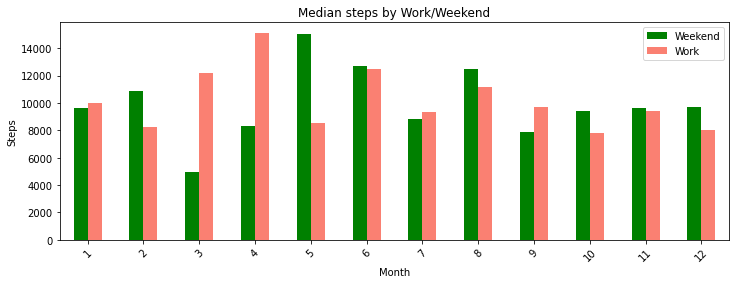

In [21]:
Figure2=Av_byday.plot(kind="bar",title="Median steps by Work/Weekend",figsize=(12,4),ylabel='Steps',xlabel="Month",color=["green","salmon"])
plt.xticks(rotation=45)
plt.legend(["Weekend","Work"])
Figure2;

In [22]:
Figure2.figure.savefig("../Figures/Figure2.jpg", dpi=100)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [23]:
fit.corr().head()

,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,...,numberofawakings,lengthofrestinminutes,distance_miles,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months_encoded
calorie_burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,...,0.030490,0.017460,0.292790,-0.041630,0.064943,0.011485,0.040965,0.048411,0.021207,0.005841
steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,...,0.106591,0.133405,0.779678,-0.024671,0.006498,0.130986,0.128463,0.089991,0.083499,-0.097077
distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,...,0.091095,0.134550,1.000000,-0.056472,0.069438,0.129442,0.126663,0.107858,0.075439,-0.122106
floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,...,0.043459,0.075864,0.382940,-0.243848,0.296749,0.069464,0.057192,0.111600,0.092766,-0.032347
minutes_sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,...,0.178387,0.208539,0.160632,-0.069168,0.071185,0.204242,0.251996,0.069396,0.058520,-0.107068


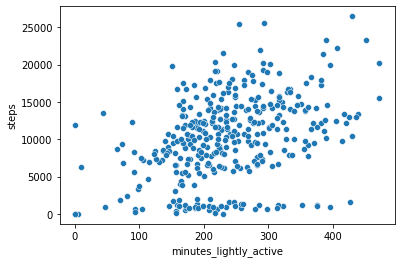

In [24]:
scat1=sns.scatterplot(x="minutes_lightly_active", y="steps", data=fit)
scat1;

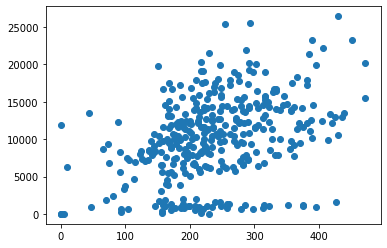

In [25]:
plt.scatter(x=fit.minutes_lightly_active, y=fit.steps);

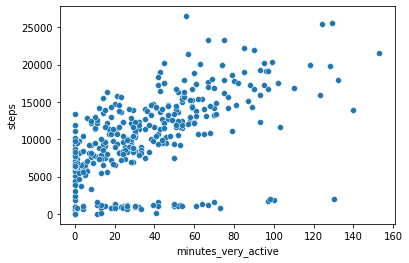

In [26]:
scat2=sns.scatterplot(x="minutes_very_active", y="steps", data=fit)
scat2;

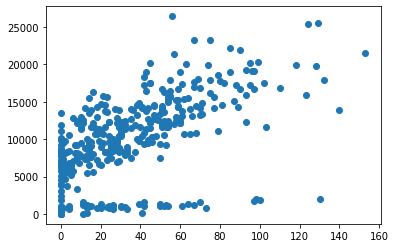

In [27]:
plt.scatter(x=fit.minutes_very_active, y=fit.steps);

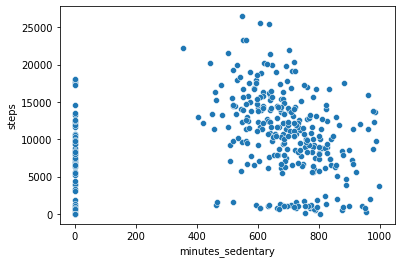

In [28]:
scat3=sns.scatterplot(x="minutes_sedentary", y="steps", data=fit)
scat3;

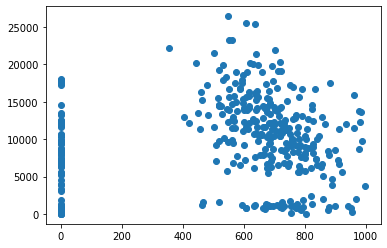

In [29]:
plt.scatter(x=fit.minutes_sedentary, y=fit.steps);

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [30]:
# your code here
titanic2=pd.read_csv("../data/titanic.csv")
titanic2

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [32]:
titanic=titanic2.copy()
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


In [33]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [34]:
titanic.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [35]:
# NUMERICAL VARIABLES
# your code here
titanic_numeric = titanic.select_dtypes(include=np.number)
titanic_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [36]:
# CATEGORICAL VARIABLES
# your code here
titanic_categorical = titanic.select_dtypes(include=object)
titanic_categorical

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [39]:
# your code here 
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_context("poster")
sns.set_style("white")

In [40]:
import matplotlib.style
matplotlib.style.use('classic')
matplotlib.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

In [41]:
def contar(x):
    if x!=0:
        return "1"

In [42]:
titanic["Ennumerate"]=titanic["PassengerId"].apply(contar)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ennumerate
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,1


In [46]:
titanic_total=titanic["Ennumerate"].groupby(titanic["Age"]).count()
TT=pd.DataFrame(titanic_total)
TT.head()

,Ennumerate
Age,
0.17,1
0.33,1
0.42,1
0.67,1
0.75,3


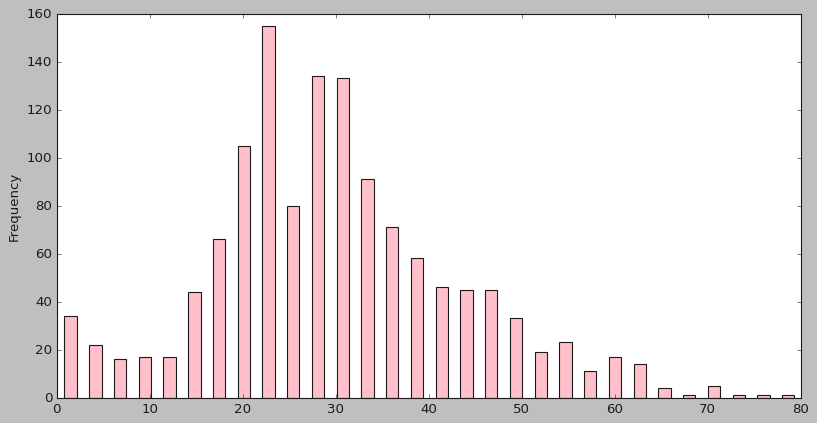

In [47]:
# your code here
Distribution_age=titanic.Age.plot.hist(color="pink", rwidth=0.5,bins=30,x="Age",y="Frecuency")
Distribution_age;

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

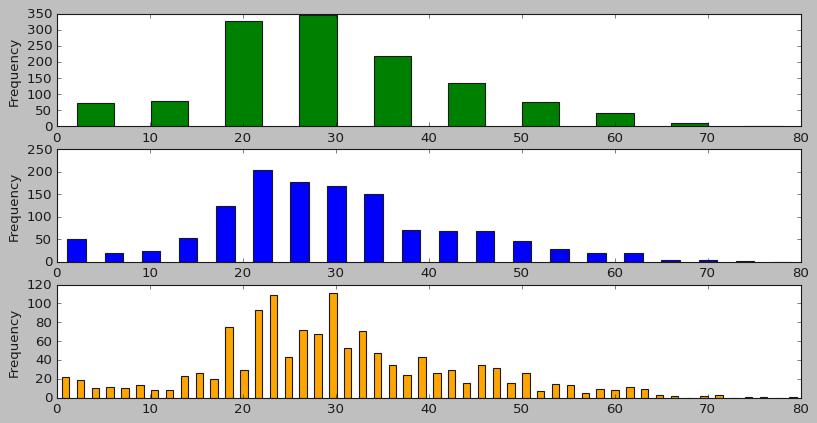

In [48]:
# your code hereç
fig,eje=plt.subplots(nrows=3, ncols=1)
titanic.Age.plot.hist(color="green", rwidth=0.5,bins=10,x="Age",y="Frecuency",ax=eje[0])
titanic.Age.plot.hist(color="blue", rwidth=0.5,bins=20,x="Age",y="Frecuency",ax=eje[1])
titanic.Age.plot.hist(color="orange", rwidth=0.5,bins=50,x="Age",y="Frecuency",ax=eje[2]);

#### How does the bin size affect your plot?

In [49]:
"""
Son datos númericos en grupos de intervalos regulares, muestran la frecuencia de los valores dentro de cada bin.
"""


'\nSon datos númericos en grupos de intervalos regulares, muestran la frecuencia de los valores dentro de cada bin.\n'

#### Use seaborn to show the distribution of column `Age`.

In [50]:
titanic.Age.fillna(0, inplace=True)

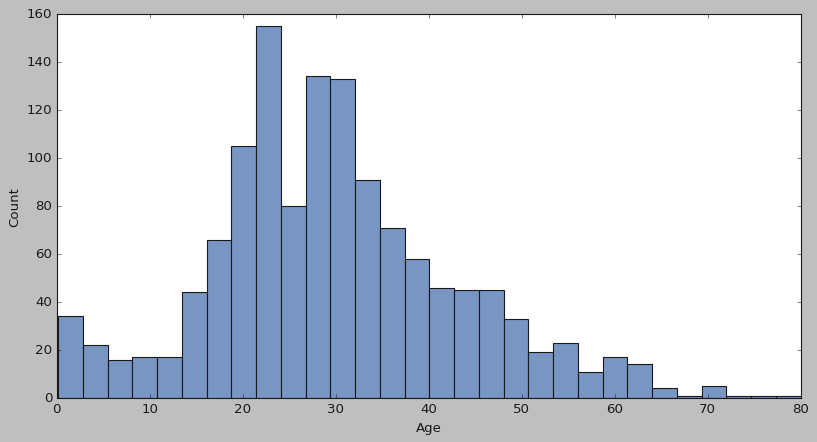

In [51]:
# your code here
sns.histplot(data=titanic, x="Age");

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [52]:
titanic.groupby("Gender").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ennumerate
Gender,,,,,,,,,,,,
female,466,314,466,466,466,466,466,466,466,466,466,466
male,843,577,843,843,843,843,843,843,843,843,843,843


In [53]:
titanic.Gender.value_counts()

male      843
female    466
Name: Gender, dtype: int64

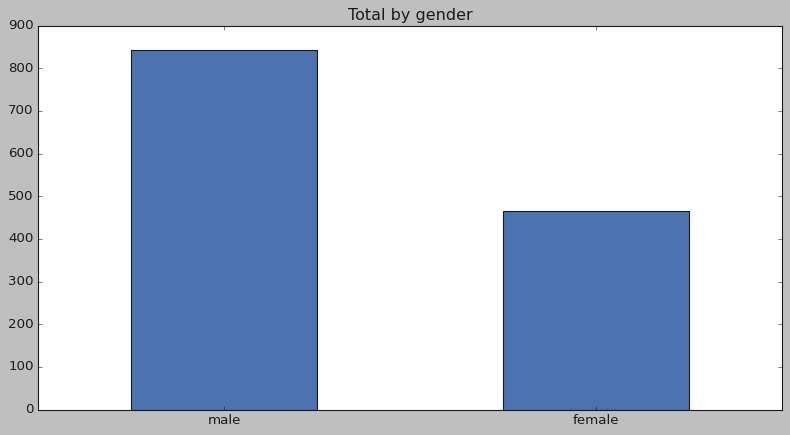

In [64]:
# Method 1 - matplotlib
# your code here
Gender_1 = titanic["Gender"].value_counts().plot(kind="bar", title="Total by gender")
plt.xticks(rotation=360)
Gender_1;

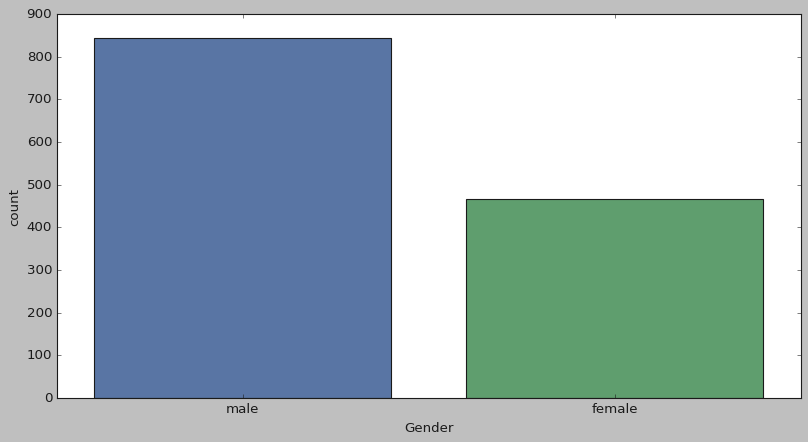

In [66]:
# Method 2 - seaborn
# your code here
Gender_2=sns.countplot(x=titanic.Gender)
Gender_2;

#### Use the right plot to visualize the column `Pclass`.

In [96]:
Total_Pclass=titanic.groupby(["Pclass","Gender"]).count()
Total_Pclass

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Gender                                                                 
1      female          144        94   144  144    144    144     144   144   
       male            179       122   179  179    179    179     179   179   
2      female          106        76   106  106    106    106     106   106   
       male            171       108   171  171    171    171     171   171   
3      female          216       144   216  216    216    216     216   216   
       male            493       347   493  493    493    493     493   493   

               Cabin  Embarked  Ennumerate  
Pclass Gender                               
1      female    144       144         144  
       male      179       179         179  
2      female    106       106         106  
       male      171       171         171  
3      female    216       216         216  
       male      493       493         493

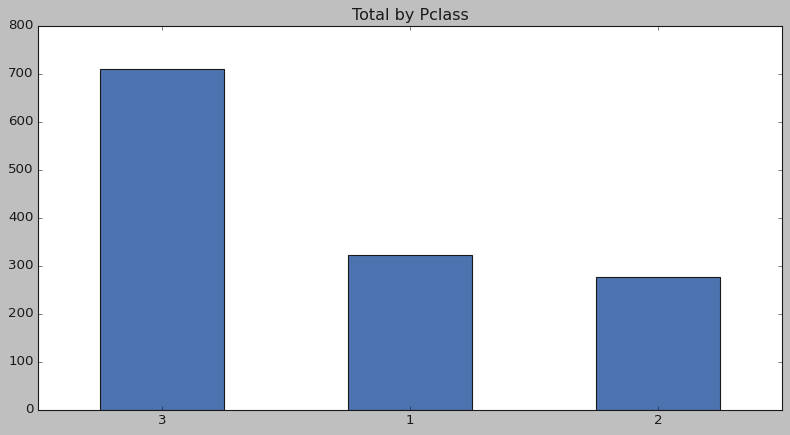

In [99]:
P_class = titanic["Pclass"].value_counts().plot(kind="bar", title="Total by Pclass",x="type")
plt.xticks(rotation=360)
P_class; 

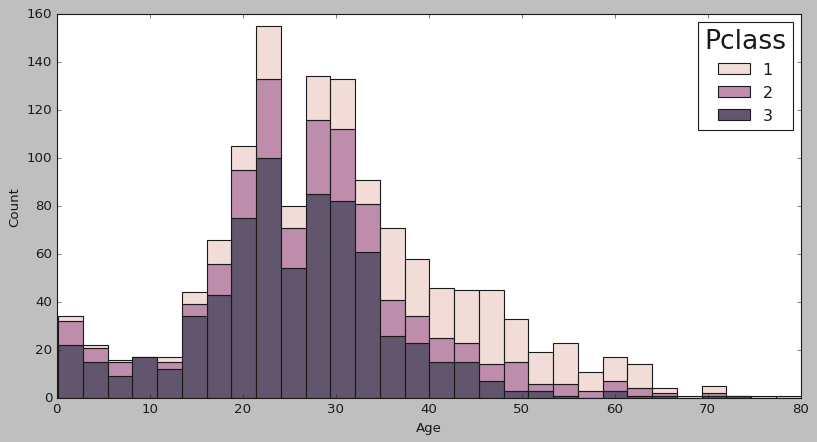

In [91]:
sns.histplot(data=titanic, x= "Age", hue="Pclass", multiple="stack");

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [100]:
"""
Boxplot. Es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. 
Se muestran a simple vista la mediana y los cuartiles de los datos, así como sus valores atípicos.
"""

'\nBoxplot. Es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. \nSe muestran a simple vista la mediana y los cuartiles de los datos, así como sus valores atípicos.\n'

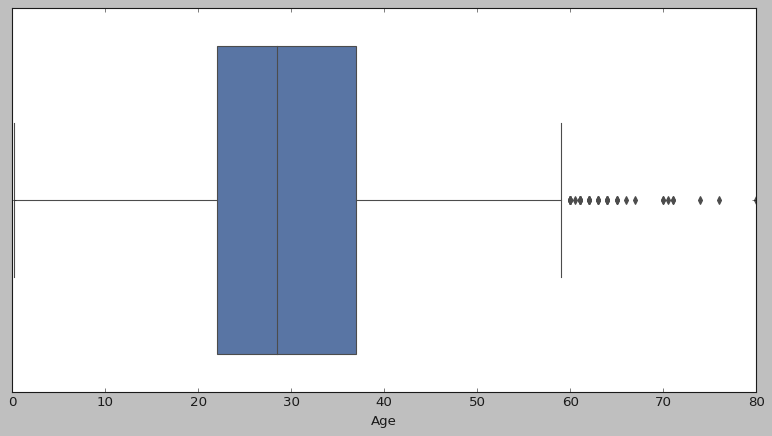

In [101]:
# your code here
sns.boxplot(x="Age", data=titanic);

In [50]:
titanic.Age.median()

28.5

In [103]:
titanic.Age.mean().round(2)

29.88

#### What does the last plot tell you about the feature `Age`?

In [105]:
"""
En primer lugar, la mediana no está en el centro del rectángulo por lo que la distribución no es simétrica. 
El valor de la medidana es de 28.5 que es la línea vertical negra situada en el medio(50% de los datos). 
La línea negra de su izquierda sería el Q1 (25% de los datos) y la línea negra de su derecha el Q3(75% de los datos).
Se consideran datos atípicos u Outliers los valores inferiores a Q1 o superiores a Q3.

"""

'\nEn primer lugar, la mediana no está en el centro del rectángulo por lo que la distribución no es simétrica. \nEl valor de la medidana es de 28.5 que es la línea vertical negra situada en el medio(50% de los datos). \nLa línea negra de su izquierda sería el Q1 (25% de los datos) y la línea negra de su derecha el Q3(75% de los datos).\nSe consideran datos atípicos u Outliers los valores inferiores a Q1 o superiores a Q3.\n\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

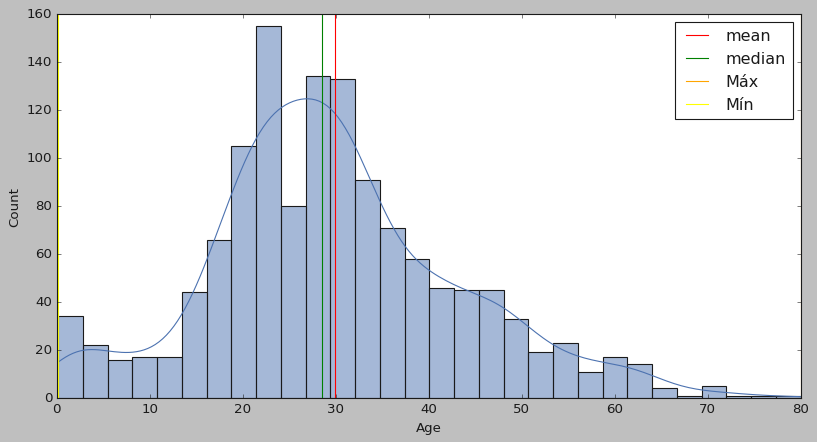

In [112]:
# your code here
graf = sns.histplot(x=titanic.Age, kde=True) 
graf.axvline(x=titanic.Age.mean(), c="red", label="mean")
graf.axvline(x=titanic.Age.median(), c="green", label="median")
graf.axvline(x=titanic.Age.max(), c="orange", label="Máx")
graf.axvline(x=titanic.Age.min(), c="yellow", label="Mín")
plt.figsize=(12,4)
plt.legend();

#### What additional information does the last plot provide about feature `Age`?

In [113]:
"""
Podemos observar la cantidad de personas que hay en cada rango de edad,en funcion de los bits que hemos elegido, mientras que
en el anterior se centra en donde hay mayor representación y no visualizas la cantidad que hay de outliers.
Sobre esa distribución representamos las diferentes variables estadísticas. 
"""

'\nPodemos observar la cantidad de personas que hay en cada rango de edad,en funcion de los bits que hemos elegido, mientras que\nen el anterior se centra en donde hay mayor representación y no visualizas la cantidad que hay de outliers.\nSobre esa distribución representamos las diferentes variables estadísticas. \n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [131]:
titanic.groupby(["Fare","Age"]).count().sample()

,,PassengerId,Survived,Pclass,Name,Gender,SibSp,Parch,Ticket,Cabin,Embarked,Ennumerate
Fare,Age,,,,,,,,,,,
13.9,22.0,1,0,1,1,1,1,1,1,1,1,1


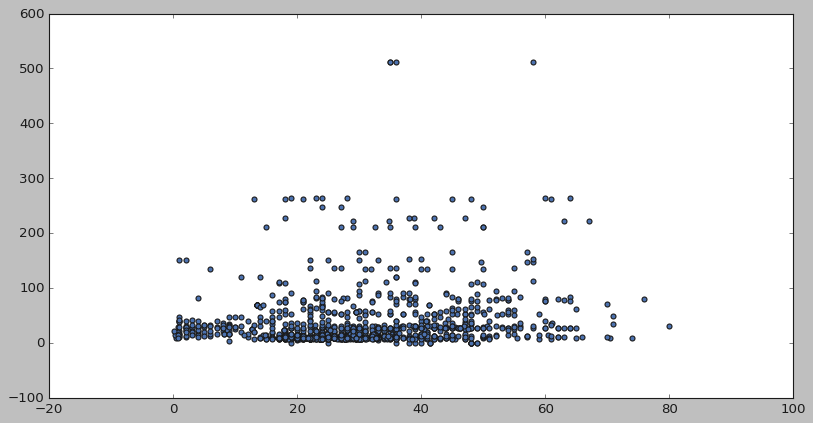

In [127]:
# Method 1 - matplotlib
# your code here
plt.scatter(x=titanic.Age, y=titanic.Fare);

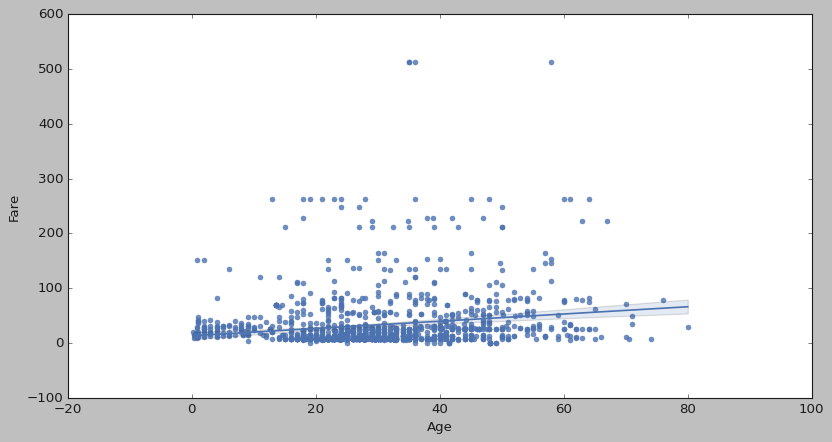

In [129]:
# Method 2 - seaborn
# your code here
sns.regplot(x="Age", y="Fare", data=titanic);

#### Plot the correlation matrix using seaborn.

In [133]:
# your code here
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


#### What are the most correlated features?

In [135]:
"""
Pclass/Age and Pclass/Fare
"""

'\nPclass/Age and Pclass/Fare\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

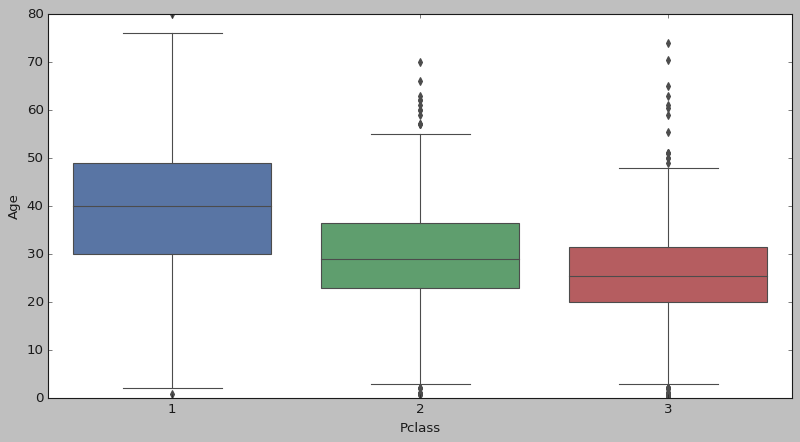

In [136]:
# your code here
sns.boxplot(x="Pclass", y="Age", data=titanic);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [154]:
titanic.groupby(["Gender","Age"]).count().head()

PassengerId  Survived  Pclass  Name  SibSp  Parch  Ticket  Fare  \
Gender Age                                                                     
female 0.17            1         0       1     1      1      1       1     1   
       0.75            2         2       2     2      2      2       2     2   
       0.92            1         0       1     1      1      1       1     1   
       1.00            5         2       5     5      5      5       5     5   
       2.00            7         6       7     7      7      7       7     7   

             Cabin  Embarked  Ennumerate  
Gender Age                                
female 0.17      1         1           1  
       0.75      2         2           2  
       0.92      1         1           1  
       1.00      5         5           5  
       2.00      7         7           7

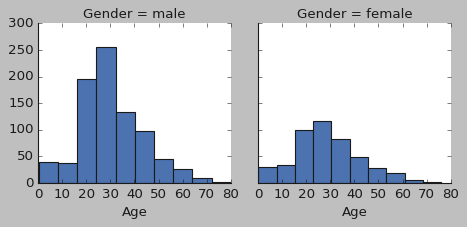

In [147]:
# your code here
Facet = sns.FacetGrid(titanic,col ="Gender")
Facet= Facet.map(plt.hist, "Age")